In [3]:
import pandas as pd
import os
import shutil

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)       

In [8]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_dataset=image.ImageDataGenerator(rescale=1.255)

In [9]:
train_generator= train_datagen.flow_from_directory(
    'D:\\COVIDXR\\test',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
    )

Found 228 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [12]:
validation_generator = test_dataset.flow_from_directory(
    "D:\\COVIDXR\\validate",
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 56 images belonging to 2 classes.


In [13]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data = validation_generator,
    validation_steps =2
    )

Epoch 1/10
8/8 [==============================] - 60s 8s/step - loss: 1.6434 - accuracy: 0.5439 - val_loss: 10.9511 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 47s 6s/step - loss: 0.6859 - accuracy: 0.5439 - val_loss: 13.7992 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 47s 6s/step - loss: 0.6729 - accuracy: 0.6140 - val_loss: 11.3715 - val_accuracy: 0.6786
Epoch 4/10
8/8 [==============================] - 46s 6s/step - loss: 0.6270 - accuracy: 0.6711 - val_loss: 3.2949 - val_accuracy: 0.9286
Epoch 5/10
8/8 [==============================] - 46s 6s/step - loss: 0.5716 - accuracy: 0.7851 - val_loss: 156.7832 - val_accuracy: 0.5714
Epoch 6/10
8/8 [==============================] - 47s 6s/step - loss: 0.4321 - accuracy: 0.8377 - val_loss: 16.3900 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 35s 4s/step - loss: 0.2950 - accuracy: 0.8860 - val_loss: 26.7693 - val_accuracy: 0.8929
Epoch 8/10
8/8 [===========

In [14]:
model.save("epic.h5")

In [ ]:
model.evaluate_generator(train_generator)

In [ ]:
model.evaluate_generator(validation_generator)

In [82]:
model = load_model('epic.h5')

In [83]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [84]:
y_actual=[]
y_test=[]

In [85]:
for i in os.listdir("./validate/Normal/"):
    img=image.load_img("./validate/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [86]:
for i in os.listdir("./validate/Covid/"):
    img=image.load_img("./validate/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [87]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [88]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)

In [89]:
import seaborn as sns

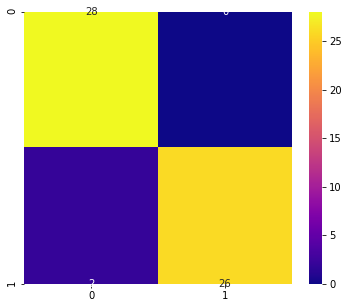

In [95]:
plt.subplots(figsize=(6,5))
sns.heatmap(cm,cmap="plasma",annot=True)